In [1]:
from rdkit import Chem

import numpy as np
import pandas as pd
import torch

import os

In [2]:
nat_com = pd.read_excel('../collecting/nat_comm_TLC_dataset.xlsx')

In [3]:
nat_com

,Unnamed: 0,TLC_ID,COMPOUND_ID,COMPOUND_SMILES,H,EA,DCM,MeOH,Et2O,Rf,COMPOUND_ENG_NAME,COMPOUND_CAS.NO
0,0,1,1,O=C(C1=CC=CC=C1)CCCl,1.000000,0.000000,0.0,0.0,0.000000,0.049175,3-Chloropropiophenone,936-59-4
1,1,2,1,O=C(C1=CC=CC=C1)CCCl,0.980392,0.019608,0.0,0.0,0.000000,0.262708,3-Chloropropiophenone,936-59-4
2,2,3,1,O=C(C1=CC=CC=C1)CCCl,0.952381,0.047619,0.0,0.0,0.000000,0.410200,3-Chloropropiophenone,936-59-4
3,3,4,1,O=C(C1=CC=CC=C1)CCCl,0.833333,0.166667,0.0,0.0,0.000000,0.719773,3-Chloropropiophenone,936-59-4
4,4,5,1,O=C(C1=CC=CC=C1)CCCl,0.750000,0.250000,0.0,0.0,0.000000,0.794856,3-Chloropropiophenone,936-59-4
...,...,...,...,...,...,...,...,...,...,...,...,...
4939,4939,4940,239,O=C1CCC(C)C2=C1C=CC=C2,0.500000,0.000000,0.0,0.0,0.500000,0.662423,NaN,NaN
4940,4940,4941,239,O=C1CCC(C)C2=C1C=CC=C2,0.000000,0.000000,0.0,0.0,1.000000,0.988897,NaN,NaN
4941,4941,4942,240,O=C1CCCC2=C1N=CC=C2,0.666667,0.000000,0.0,0.0,0.333333,0.000000,NaN,NaN
4942,4942,4943,240,O=C1CCCC2=C1N=CC=C2,0.500000,0.000000,0.0,0.0,0.500000,0.010664,NaN,NaN


In [4]:
nat_com = nat_com.loc[:,['COMPOUND_SMILES', 'H', 'EA', 'DCM', 'MeOH', 'Et2O', 'Rf']]
nat_com

,COMPOUND_SMILES,H,EA,DCM,MeOH,Et2O,Rf
0,O=C(C1=CC=CC=C1)CCCl,1.000000,0.000000,0.0,0.0,0.000000,0.049175
1,O=C(C1=CC=CC=C1)CCCl,0.980392,0.019608,0.0,0.0,0.000000,0.262708
2,O=C(C1=CC=CC=C1)CCCl,0.952381,0.047619,0.0,0.0,0.000000,0.410200
3,O=C(C1=CC=CC=C1)CCCl,0.833333,0.166667,0.0,0.0,0.000000,0.719773
4,O=C(C1=CC=CC=C1)CCCl,0.750000,0.250000,0.0,0.0,0.000000,0.794856
...,...,...,...,...,...,...,...
4939,O=C1CCC(C)C2=C1C=CC=C2,0.500000,0.000000,0.0,0.0,0.500000,0.662423
4940,O=C1CCC(C)C2=C1C=CC=C2,0.000000,0.000000,0.0,0.0,1.000000,0.988897
4941,O=C1CCCC2=C1N=CC=C2,0.666667,0.000000,0.0,0.0,0.333333,0.000000
4942,O=C1CCCC2=C1N=CC=C2,0.500000,0.000000,0.0,0.0,0.500000,0.010664


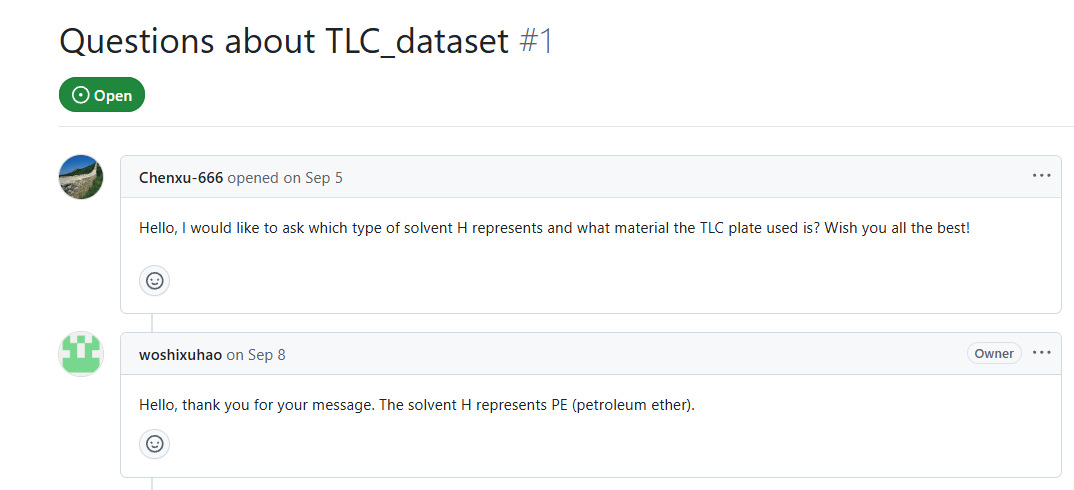

In [5]:
PE_evidence = './TLC_PE_evidence.png'
from IPython.display import Image, display

display(Image(PE_evidence))


In [6]:
elu = nat_com.loc[:,['H', 'EA', 'DCM', 'MeOH', 'Et2O']]!=0

elu_smiles_array = np.array(['CCCCCC', 'O=C(OCC)C', 'ClCCl', 'CO', 'CCOCC'])

elu_smiles_pair = [elu_smiles_array[elu.loc[i,:]] for i in range(len(elu))]

for idx, smiles_pair in enumerate(elu_smiles_pair):
    if len(smiles_pair)==1:
        elu_smiles_pair[idx] = np.append(elu_smiles_pair[idx], None)

elu_smiles_columns = pd.DataFrame(np.vstack(elu_smiles_pair))
elu_smiles_columns.columns=['elu1_smiles', 'elu2_smiles']

elu_ratio_pair = [np.array(nat_com.loc[:,['H', 'EA', 'DCM', 'MeOH', 'Et2O']].loc[i,:])[elu.loc[i,:]] for i in range(len(elu))]

for idx, ratio_pair in enumerate(elu_ratio_pair):
    if len(ratio_pair)==1:
        elu_ratio_pair[idx] = np.append(elu_ratio_pair[idx], 0)

elu_ratio_columns = pd.DataFrame(np.vstack(elu_ratio_pair))
elu_ratio_columns.columns = ['ratio1', 'ratio2']

In [7]:
nat_commun_raw = pd.DataFrame({'Smiles': nat_com['COMPOUND_SMILES']})
nat_commun_raw = pd.concat([nat_commun_raw,elu_smiles_columns, elu_ratio_columns, nat_com['Rf']], axis=1)
nat_commun_raw

,Smiles,elu1_smiles,elu2_smiles,ratio1,ratio2,Rf
0,O=C(C1=CC=CC=C1)CCCl,CCCCCC,None,1.000000,0.000000,0.049175
1,O=C(C1=CC=CC=C1)CCCl,CCCCCC,O=C(OCC)C,0.980392,0.019608,0.262708
2,O=C(C1=CC=CC=C1)CCCl,CCCCCC,O=C(OCC)C,0.952381,0.047619,0.410200
3,O=C(C1=CC=CC=C1)CCCl,CCCCCC,O=C(OCC)C,0.833333,0.166667,0.719773
4,O=C(C1=CC=CC=C1)CCCl,CCCCCC,O=C(OCC)C,0.750000,0.250000,0.794856
...,...,...,...,...,...,...
4939,O=C1CCC(C)C2=C1C=CC=C2,CCCCCC,CCOCC,0.500000,0.500000,0.662423
4940,O=C1CCC(C)C2=C1C=CC=C2,CCOCC,None,1.000000,0.000000,0.988897
4941,O=C1CCCC2=C1N=CC=C2,CCCCCC,CCOCC,0.666667,0.333333,0.000000
4942,O=C1CCCC2=C1N=CC=C2,CCCCCC,CCOCC,0.500000,0.500000,0.010664


In [8]:
import sys
sys.path.append('../../../')
from functions import delete_weird_mol_and_None_except_Nan, delete_metal_mol_except_Nan

nat_commun_raw = delete_weird_mol_and_None_except_Nan(nat_commun_raw, 'Smiles')
nat_commun_raw = delete_metal_mol_except_Nan(nat_commun_raw, 'Smiles')

In [9]:
nat_commun_raw = nat_commun_raw[(0<nat_commun_raw['Rf']) & (nat_commun_raw['Rf']<=1)]
nat_commun_raw.index = range(len(nat_commun_raw))
nat_commun_raw

,Smiles,elu1_smiles,elu2_smiles,ratio1,ratio2,Rf
0,O=C(C1=CC=CC=C1)CCCl,CCCCCC,None,1.000000,0.000000,0.049175
1,O=C(C1=CC=CC=C1)CCCl,CCCCCC,O=C(OCC)C,0.980392,0.019608,0.262708
2,O=C(C1=CC=CC=C1)CCCl,CCCCCC,O=C(OCC)C,0.952381,0.047619,0.410200
3,O=C(C1=CC=CC=C1)CCCl,CCCCCC,O=C(OCC)C,0.833333,0.166667,0.719773
4,O=C(C1=CC=CC=C1)CCCl,CCCCCC,O=C(OCC)C,0.750000,0.250000,0.794856
...,...,...,...,...,...,...
4854,O=C1CCC(C)C2=C1C=CC=C2,CCCCCC,CCOCC,0.666667,0.333333,0.498683
4855,O=C1CCC(C)C2=C1C=CC=C2,CCCCCC,CCOCC,0.500000,0.500000,0.662423
4856,O=C1CCC(C)C2=C1C=CC=C2,CCOCC,None,1.000000,0.000000,0.988897
4857,O=C1CCCC2=C1N=CC=C2,CCCCCC,CCOCC,0.500000,0.500000,0.010664


In [10]:
# ratio1 > ratio2 되도록 정렬 --> 중복 데이터 판별시 필요 (중복 제거는 추후에 모든 데이터 합치고 필터링 한 후에 진행함)

switch_ratio_mask = nat_commun_raw['ratio1']-nat_commun_raw['ratio2']<0

nat_commun_raw.loc[switch_ratio_mask, ['ratio1','ratio2']] = nat_commun_raw.loc[switch_ratio_mask, ['ratio2', 'ratio1']].values
nat_commun_raw.loc[switch_ratio_mask, ['elu1_smiles','elu2_smiles']] = nat_commun_raw.loc[switch_ratio_mask, ['elu2_smiles', 'elu1_smiles']].values

In [11]:
from copy import deepcopy
nat_commun_raw_567 = deepcopy(nat_commun_raw)

nat_commun_raw_567['elu1_smiles'] = ['CCCCC.CCCCCC.CCCCCCC' if s=='CCCCCC' else s for s in nat_commun_raw_567['elu1_smiles']]
nat_commun_raw_567['elu2_smiles'] = ['CCCCC.CCCCCC.CCCCCCC' if s=='CCCCCC' else s for s in nat_commun_raw_567['elu2_smiles']]

nat_commun_raw_567

,Smiles,elu1_smiles,elu2_smiles,ratio1,ratio2,Rf
0,O=C(C1=CC=CC=C1)CCCl,CCCCC.CCCCCC.CCCCCCC,None,1.000000,0.000000,0.049175
1,O=C(C1=CC=CC=C1)CCCl,CCCCC.CCCCCC.CCCCCCC,O=C(OCC)C,0.980392,0.019608,0.262708
2,O=C(C1=CC=CC=C1)CCCl,CCCCC.CCCCCC.CCCCCCC,O=C(OCC)C,0.952381,0.047619,0.410200
3,O=C(C1=CC=CC=C1)CCCl,CCCCC.CCCCCC.CCCCCCC,O=C(OCC)C,0.833333,0.166667,0.719773
4,O=C(C1=CC=CC=C1)CCCl,CCCCC.CCCCCC.CCCCCCC,O=C(OCC)C,0.750000,0.250000,0.794856
...,...,...,...,...,...,...
4854,O=C1CCC(C)C2=C1C=CC=C2,CCCCC.CCCCCC.CCCCCCC,CCOCC,0.666667,0.333333,0.498683
4855,O=C1CCC(C)C2=C1C=CC=C2,CCCCC.CCCCCC.CCCCCCC,CCOCC,0.500000,0.500000,0.662423
4856,O=C1CCC(C)C2=C1C=CC=C2,CCOCC,None,1.000000,0.000000,0.988897
4857,O=C1CCCC2=C1N=CC=C2,CCCCC.CCCCCC.CCCCCCC,CCOCC,0.500000,0.500000,0.010664


In [12]:
# compound smiles canonicalize 

nat_commun_raw.loc[:, 'Smiles'] = [Chem.MolToSmiles(Chem.MolFromSmiles(smiles), isomericSmiles=True, canonical=True) for smiles in nat_commun_raw['Smiles']]

nat_commun_raw_567.loc[:, 'Smiles'] = [Chem.MolToSmiles(Chem.MolFromSmiles(smiles), isomericSmiles=True, canonical=True) for smiles in nat_commun_raw_567['Smiles']]

In [13]:
# eluent smiles cononicalize
nat_commun_raw['elu1_smiles'] = [Chem.MolToSmiles(Chem.MolFromSmiles(s), canonical=True) if pd.notna(s) else np.nan for s in nat_commun_raw['elu1_smiles']]
nat_commun_raw['elu2_smiles'] = [Chem.MolToSmiles(Chem.MolFromSmiles(s), canonical=True) if pd.notna(s) else np.nan for s in nat_commun_raw['elu2_smiles']]

nat_commun_raw_567['elu1_smiles'] = [Chem.MolToSmiles(Chem.MolFromSmiles(s), canonical=True) if pd.notna(s) else np.nan for s in nat_commun_raw_567['elu1_smiles']]
nat_commun_raw_567['elu2_smiles'] = [Chem.MolToSmiles(Chem.MolFromSmiles(s), canonical=True) if pd.notna(s) else np.nan for s in nat_commun_raw_567['elu2_smiles']]

In [14]:
nat_commun_raw

,Smiles,elu1_smiles,elu2_smiles,ratio1,ratio2,Rf
0,O=C(CCCl)c1ccccc1,CCCCCC,NaN,1.000000,0.000000,0.049175
1,O=C(CCCl)c1ccccc1,CCCCCC,CCOC(C)=O,0.980392,0.019608,0.262708
2,O=C(CCCl)c1ccccc1,CCCCCC,CCOC(C)=O,0.952381,0.047619,0.410200
3,O=C(CCCl)c1ccccc1,CCCCCC,CCOC(C)=O,0.833333,0.166667,0.719773
4,O=C(CCCl)c1ccccc1,CCCCCC,CCOC(C)=O,0.750000,0.250000,0.794856
...,...,...,...,...,...,...
4854,CC1CCC(=O)c2ccccc21,CCCCCC,CCOCC,0.666667,0.333333,0.498683
4855,CC1CCC(=O)c2ccccc21,CCCCCC,CCOCC,0.500000,0.500000,0.662423
4856,CC1CCC(=O)c2ccccc21,CCOCC,NaN,1.000000,0.000000,0.988897
4857,O=C1CCCc2cccnc21,CCCCCC,CCOCC,0.500000,0.500000,0.010664


### Rf_type 추가

In [15]:
nat_commun_raw['Rf_type'] = ['C' for i in range(len(nat_commun_raw))]
nat_commun_raw_567['Rf_type'] = ['C' for i in range(len(nat_commun_raw_567))]

In [16]:
nat_commun_raw.to_csv('../collecting/primary_processed_PE_hex/nat_commun_raw_PE_hex.csv', index=False)
nat_commun_raw_567.to_csv('../collecting/primary_processed_PE_567/nat_commun_raw_PE_567.csv', index=False)